## Load Data

In [19]:
import pandas as pd

data = pd.read_csv("Spam_Data.csv")

## Data Preprocessing

### Data Analysis

In [20]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data.shape

(5572, 2)

In [22]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [24]:
data["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

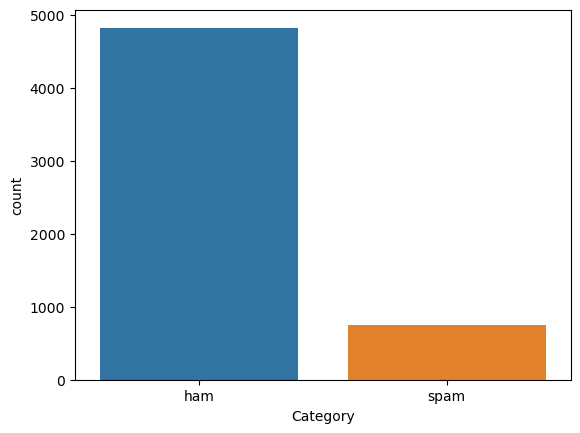

In [89]:
import seaborn as sns

sns.countplot(x='Category',data=data)


### Data Cleaning

### Check if there are null values. if so replace null values with null string

In [31]:
data["Message"].isnull().sum()

0

In [32]:
## In our data set there is no null values. But if there are null values we can replace null values with null string
data = data.where((pd.notnull(data)),'')

#### Check if there is duplicate data in the dataset. If so remove them.

In [34]:
duplicates_data = data[data.duplicated()]
duplicates_data


,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [29]:
## Checking number of duplicates in data
data_duplicate=data[data.duplicated(keep='first')]
data_duplicate.shape

(403, 2)

In [30]:
## Remove all duplucates , keeping first occurrence of the duplicates
data_new = data.drop_duplicates(keep='first')
data_new.shape

(5169, 2)

## Convert the category column into numarical value

In [38]:
data_new.replace({'Category':{'spam':0,'ham':1}},inplace=True)
data_new



,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


## Split the data Set

In [51]:
from sklearn.model_selection import train_test_split
x=data_new['Message']
y=data_new['Category']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [52]:
x_train.shape

(4135,)

In [53]:
x_test.shape

(1034,)

## Feature Extraction using 'Term Frequency Inverse Document Frequency(TFIDF)'

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [54]:
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [50]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [57]:
print(x_train_features)

  (0, 1148)	0.38886157924131337
  (0, 3318)	0.33824667565263017
  (0, 2078)	0.6456415420195136
  (0, 6358)	0.5634916661482767
  (1, 2826)	0.5999078290884902
  (1, 4676)	0.29521039851243697
  (1, 6516)	0.3421150162018962
  (1, 3443)	0.42509454663692126
  (1, 3296)	0.505186459950373
  (2, 892)	0.5668014552403886
  (2, 3917)	0.27214471935208123
  (2, 6380)	0.4680662270436954
  (2, 3186)	0.42631671591666076
  (2, 2128)	0.3306557304889685
  (2, 6435)	0.30742188404873544
  (3, 6435)	1.0
  (4, 6685)	0.557859291750432
  (4, 3963)	0.3410680461202789
  (4, 2260)	0.48617007555638087
  (4, 6531)	0.47383480978949816
  (4, 4676)	0.33404315468013207
  (5, 4399)	0.1421038574910121
  (5, 379)	0.24872569584755835
  (5, 6181)	0.13546326009102178
  (5, 2117)	0.12285686215294839
  :	:
  (4130, 2231)	0.22014970009237128
  (4130, 3774)	0.19093347384053416
  (4130, 2117)	0.19668858694267874
  (4131, 841)	0.46428148124552554
  (4131, 1720)	0.4038518793635036
  (4131, 6986)	0.333650506502353
  (4131, 4286)	0.34

## Train the model using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train_features,y_train)


LogisticRegression()

## Evaluate the model

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### For training data Set

In [81]:
prediction_on_training_LR=model_LR.predict(x_train_features)

accuracy_on_training_LR=accuracy_score(y_train,prediction_on_training_LR)
accuracy_on_training_LR

0.9654171704957678

#### For Tesing data set

In [82]:
prediction_on_testing_LR=model_LR.predict(x_test_features)

accuracy_on_testing_LR=accuracy_score(y_test,prediction_on_testing_LR)
accuracy_on_testing_LR

0.941972920696325

In [83]:
confusion_matrix_LR=confusion_matrix(y_test,prediction_on_testing_LR)
confusion_matrix_LR

array([[ 78,  57],
       [  3, 896]], dtype=int64)

## Train the model using Naive Bayer Classifier

In [79]:
from sklearn.naive_bayes import MultinomialNB
model_NB=MultinomialNB()
model_NB.fit(x_train_features,y_train)

MultinomialNB()

## Evaluate the model

#### For training data Set

In [86]:
prediction_on_training_NB=model_NB.predict(x_train_features)

accuracy_on_training_NB=accuracy_score(y_train,prediction_on_training_NB)
accuracy_on_training_NB

0.9804111245465538

#### For testing data Set

In [87]:
prediction_on_tesing_NB=model_NB.predict(x_train_features)

accuracy_on_testing_NB=accuracy_score(y_train,prediction_on_tesing_NB)
accuracy_on_testing_NB

0.9804111245465538

In [88]:
confusion_matrix_on_tesing_NB=confusion_matrix(y_train,prediction_on_tesing_NB)
confusion_matrix_on_tesing_NB

array([[ 437,   81],
       [   0, 3617]], dtype=int64)

## Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score